# Laboratory Activity 9

C:\Users\Gio Vincent\AppData\Local\Temp\ipykernel_63044\1680443941.py:6: WavFileWarning: Reached EOF prematurely; finished at 561196 bytes, expected 561204 bytes from header.
  sample_rate, data = wavfile.read(r'C:\Users\Gio Vincent\Downloads\dsp_lab9_audio.wav')


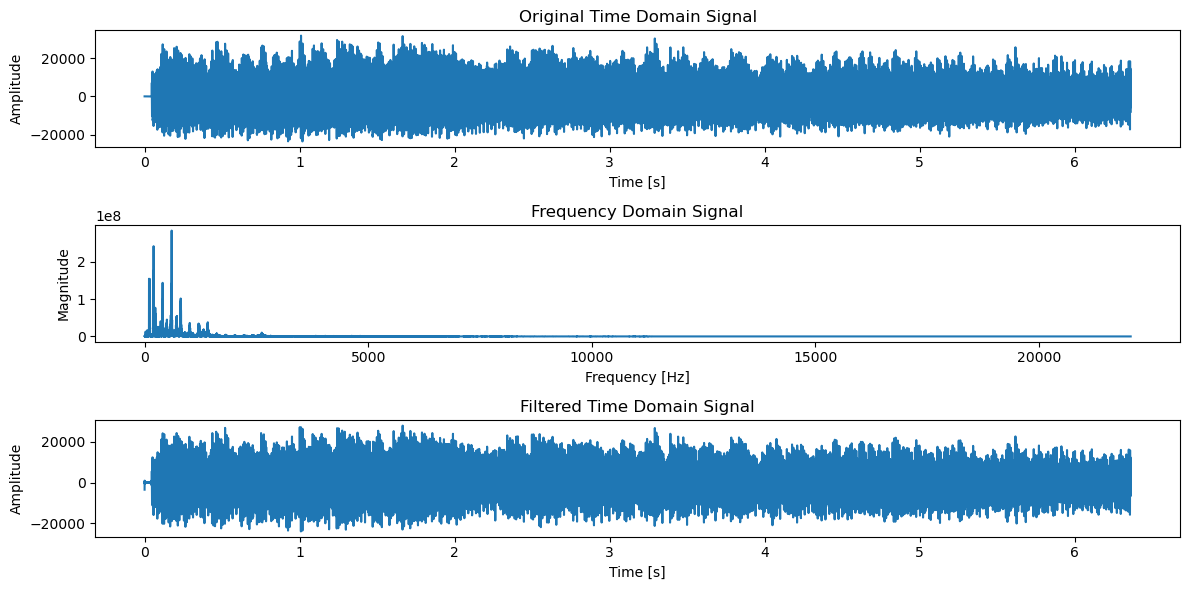

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile


sample_rate, data = wavfile.read(r'C:\Users\Gio Vincent\Downloads\dsp_lab9_audio.wav')

if data.ndim == 2:
    data = np.mean(data, axis=1)


duration = len(data) / sample_rate
time = np.linspace(0, duration, num=len(data))

# Apply Fourier Transform
frequency_spectrum = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(frequency_spectrum), d=1/sample_rate)


threshold = 1000
filter_mask = np.abs(frequencies) < threshold

filtered_spectrum = frequency_spectrum * filter_mask

filtered_data = np.fft.ifft(filtered_spectrum)
filtered_data = np.real(filtered_data)

filtered_data = np.clip(filtered_data, -32768, 32767).astype(np.int16)

# Plotting time-domain representation for original signal
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, data)
plt.title('Original Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plotting frequency-domain representation
plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(frequency_spectrum[:len(frequency_spectrum)//2]))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Plot filtered time-domain representation
plt.subplot(3, 1, 3)
plt.plot(time, filtered_data)
plt.title('Filtered Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

wavfile.write('filtered_audio.wav', sample_rate, filtered_data)
